**Importing Python Libraries**

In [ ]:
import numpy as np
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
import random as rn
import math

**Data Importing**

In [ ]:
df = pd.read_csv('FUDS45.csv')
df.head()

,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),A,SOC,SOC%
0,0.000000,2.968420,0.000000,0.0,0.0,1.0,100.0
1,0.999364,3.102444,0.002780,0.0,0.0,1.0,100.0
2,0.999364,3.136801,0.005561,0.0,0.0,1.0,100.0
3,0.999544,3.165972,0.008341,0.0,0.0,1.0,100.0
4,0.999364,3.191253,0.011122,0.0,0.0,1.0,100.0


In [ ]:
X =df.drop(['Charge_Capacity(Ah)','Discharge_Capacity(Ah)', 'A', 'SOC', 'SOC%'], axis=1)
X = X.dropna()
print(X)

      Current(A)  Voltage(V)
0       0.000000    2.968420
1       0.999364    3.102444
2       0.999364    3.136801
3       0.999544    3.165972
4       0.999364    3.191253
...          ...         ...
6855   -0.420134    3.606614
6856   -0.420314    3.606452
6857   -0.101133    3.630437
6858   -0.253261    3.619093
6859   -0.415099    3.606776

[6860 rows x 2 columns]


**Moving Average Filter for Input Quantities**

In [ ]:
L=6860 #L-point filter
b = (np.ones(L))/L #numerator co-effs of filter transfer function
a = 1  #denominator co-effs of filter transfer function
Xf = signal.lfilter(b,a,X) #filter output using lfilter function
print(Xf)

[[ 0.00000000e+00  4.32714290e-04]
 [ 1.45679912e-04  5.97931214e-04]
 [ 1.45679912e-04  6.02939499e-04]
 ...
 [-1.47424606e-05  5.14475781e-04]
 [-3.69184958e-05  4.90646073e-04]
 [-6.05100185e-05  4.65259112e-04]]


             0         1
0     0.000000  0.000433
1     0.000146  0.000598
2     0.000146  0.000603
3     0.000146  0.000607
4     0.000146  0.000611
...        ...       ...
6855 -0.000061  0.000465
6856 -0.000061  0.000464
6857 -0.000015  0.000514
6858 -0.000037  0.000491
6859 -0.000061  0.000465

[6860 rows x 2 columns]


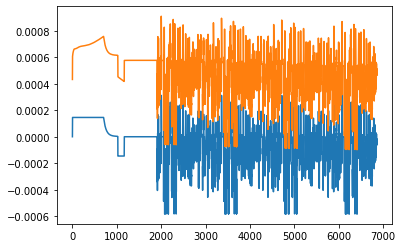

In [ ]:
Xf1 = pd.DataFrame(Xf)
print(Xf1)
plt.plot(Xf1)

**Data Normalization**

             0         1
0     0.302536  0.051912
1     0.627979  0.379869
2     0.627979  0.389810
3     0.628038  0.398303
4     0.627979  0.405566
...        ...       ...
6855  0.165720  0.115010
6856  0.165661  0.114911
6857  0.269602  0.214209
6858  0.220062  0.166907
6859  0.167360  0.116514

[6860 rows x 2 columns]


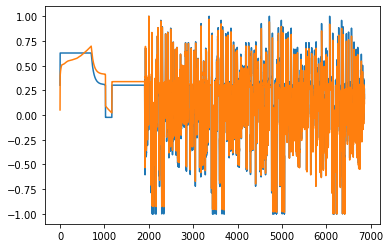

In [ ]:
df_min_max_scaled = Xf1.copy()  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = -1 + 2*(df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
    Xn = df_min_max_scaled.copy()
# view normalized data
print(Xn)
plt.plot(Xn)

In [ ]:
Y =df.drop(['Current(A)','Voltage(V)','Charge_Capacity(Ah)','Discharge_Capacity(Ah)','A','SOC%'], axis=1)
Y = Y.dropna()
print(Y)

               SOC
0     1.000000e+00
1     1.000000e+00
2     1.000000e+00
3     1.000000e+00
4     1.000000e+00
...            ...
6855  2.570640e-04
6856  1.657030e-04
6857  1.221800e-04
6858  7.844310e-05
6859  1.610020e-07

[6860 rows x 1 columns]


**Dataset Splitting into Training and Testing Data**

In [ ]:
from sklearn.model_selection import train_test_split
train_Xn, test_Xn, train_Y, test_Y = train_test_split(Xn, Y,train_size=0.7,test_size=0.3)
print("Labels for training and testing data")
print(train_Y)
print(test_Y)
print(train_Xn)
print(test_Xn)

Labels for training and testing data
           SOC
4609  0.323485
5972  0.139297
6495  0.042197
966   1.000000
1325  0.691908
...        ...
4099  0.372452
2104  0.654827
972   1.000000
2343  0.604687
1221  0.691908

[4802 rows x 1 columns]
           SOC
4228  0.358177
5121  0.228933
2168  0.631136
6615  0.030669
4755  0.307814
...        ...
1853  0.691908
6223  0.085843
1409  0.691908
6455  0.047690
1735  0.691908

[2058 rows x 1 columns]
             0         1
4609  0.302454  0.282415
5972  0.302395  0.256759
6495  0.327341  0.271234
966   0.311764  0.416645
1325  0.302536  0.338667
...        ...       ...
4099  0.447620  0.424440
2104 -0.373426 -0.322834
972   0.311354  0.416280
2343 -0.506998 -0.457933
1221  0.302536  0.338386

[4802 rows x 2 columns]
             0         1
4228  0.284359  0.266947
5121 -0.089946 -0.109866
2168  0.305791  0.322146
6615  0.002401 -0.040847
4755  0.302454  0.280774
...        ...       ...
1853  0.302536  0.338902
6223  0.173918  0.125906
140

**Sigmoid Function**

In [ ]:
# defining the Sigmoid Function
def sigmoid (Xn):
    return 1/(1 + np.exp(-Xn))

# derivative of Sigmoid Function
def derivatives_sigmoid(Xn):
    return Xn * (1 - Xn)

**Initialization of Parameters**

In [ ]:
#Weights
w0 = 2*np.random.random((2, 3)) - 1 #for input   - 2 inputs, 1 outputs
w1 = 2*np.random.random((3, 3)) - 1 #for layer 1 - 2 inputs, 1 outputs
w2 = 2*np.random.random((3, 1)) - 1 #for layer 2 - 2 inputs, 1 outputs
#learning rate
n = 0.1
epoch = 500
hiddenlayer_neurons = 3
hiddenlayer = 2

In [ ]:
errors = []

**Feed-Forward Backpropagation**

In [ ]:
for i in range (epoch):

    #Feed forward network
    layer0 = train_Xn    #Input Layer
    layer1 = sigmoid(np.dot(layer0, w0))  #Hidden Layer 1
    layer2 = sigmoid(np.dot(layer1, w1))  #Hidden Layer 2
    layer3 = sigmoid(np.dot(layer2, w2))  #Output Layer 

    #Back propagation using gradient descent
    layer3_error = train_Y - layer3
    layer3_delta = layer3_error * derivatives_sigmoid(layer3)

    layer2_error = layer3_delta.dot (w2.T)
    layer2_delta = layer2_error * derivatives_sigmoid(layer2)

    layer1_error = layer2_delta.dot (w1.T)
    layer1_delta = layer1_error * derivatives_sigmoid(layer1)

    w2 += layer2.T.dot(layer3_delta) * n 
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n

    error = np.mean(np.abs(layer3_error))
    errors.append(error)

**Calculation of Accuracy of Training Model**

In [ ]:
accuracy_training = (1 - error) * 100

In [ ]:
print ("Training Accuracy of the model   " + str (round(accuracy_training,2)) + "%")

Training Accuracy of the model   SOC    80.15
dtype: float64%


**SOC Graph**

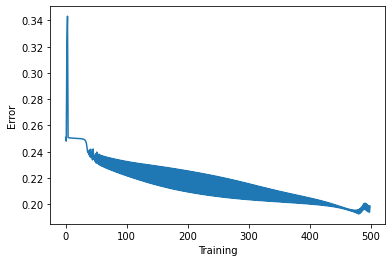

In [ ]:
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()

**Mean Square Error Calculation**

In [ ]:
MSE = np.mean((train_Y - layer3)**2) # Mean Squared Error
print(MSE)
errors.append(MSE)

SOC    0.064173
dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_Y,layer3)

0.06417291866647304

**Absolute Error Calculation**

In [ ]:
print(error) # Absolute Error Value

SOC    0.198501
dtype: float64


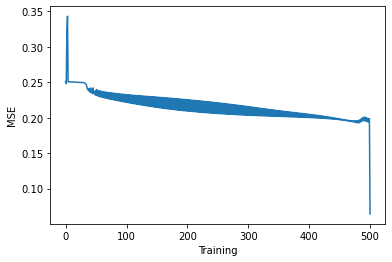

In [ ]:
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('MSE')# SOC 
plt.show()

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(train_Y,layer3)
layer2n = linear_regressor.predict(train_Y)

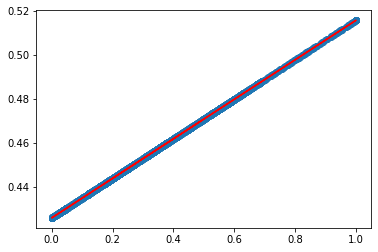

In [ ]:
plt.scatter(train_Y,layer2n)
plt.plot(train_Y, layer2n, color='red')
plt.show()

**Testing Part**

In [ ]:
#Testing
layer0t = test_Xn

layer1t = sigmoid(np.dot(layer0t, w0))
layer2t = sigmoid(np.dot(layer1t, w1))
layer3t = sigmoid(np.dot(layer2t, w2))

layer3t_error = test_Y - layer3t
error = np.mean(np.abs(layer3t_error))
errors.append(error)

**Testing Accuracy Calculation**

In [ ]:
accuracy_testing = (1 - error) * 100

In [ ]:
print ("Testing Accuracy of the model   " + str (round(accuracy_testing,2)) + "%")

Testing Accuracy of the model   SOC    76.98
dtype: float64%


**SOC error Graph**

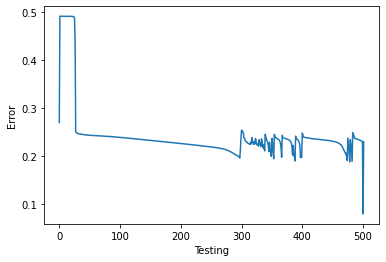

In [ ]:
plt.plot(errors)
plt.xlabel('Testing')
plt.ylabel('Error')
plt.show()

**Mean Square Error**

In [ ]:
MSE_T = np.mean((test_Y - layer3t)**2) # Mean Squared Error
print(MSE_T)
errors.append(MSE_T)

SOC    0.080177
dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_Y,layer3t)

0.08017693620915092

**Mean Absolute Error**

In [ ]:
print(error) # Absolute Error Value

SOC    0.230191
dtype: float64


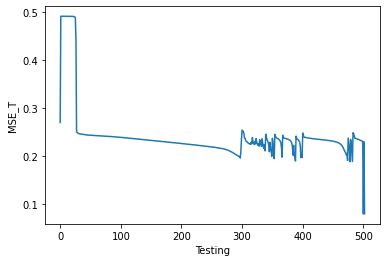

In [ ]:
plt.plot(errors)
plt.xlabel('Testing')
plt.ylabel('MSE_T')# SOC 
plt.show()